# `example5_ols_statsmodels`


Auto MPG 데이터셋은 1970~1980년대 미국 차량의 연비 데이터를 담고 있으며,
UCI Machine Learning Repository에서도 널리 사용되는 표준 벤치마크

|     컬럼 이름    |                     설명                    |   타입   | 결측치 수 |           비고          |
| :----------: | :---------------------------------------: | :----: | :---: | :-------------------: |
|      mpg     | 연비(miles per gallon) – 회귀의 **타깃(target)** |  float |   0   |   연비가 높을수록 연료 효율 우수   |
|   cylinders  |                   실린더 개수                  |   int  |   0   |        보통 3\~8개       |
| displacement |             배기량(cubic inches)             |  float |   0   |       엔진의 크기 지표       |
|  horsepower  |               마력(horsepower)              |  float |   6   | 일부 누락 → 행 제거 or 대체 필요 |
|    weight    |               차체 무게(pounds)               |  float |   0   |     무거울수록 연비 저하 경향    |
| acceleration |           0→60mph 가속 시간(seconds)          |  float |   0   |     낮을수록 가속 성능 우수     |
|  model\_year |       출시 연도(1970\~1982, 뒤 두 자리로 표기)       |   int  |   0   |       자동차 세대 구분       |
|    origin    |      제조국 코드(1=USA, 2=Europe, 3=Japan)     |   int  |   0   |         범주형 변수        |
|     name     |                  모델명(문자열)                 | object |   0   |        분석에서는 제외       |


결측치 처리: horsepower에 6개 누락값이 있어, 예제에서는 .dropna()로 해당 행들을 제거.

설명 변수(독립 변수) 선택: horsepower, weight, displacement 세 가지만 사용해 연비(mpg)를 예측.

In [5]:
# Example 5: OLS Regression with Statsmodels on Auto MPG Dataset

# 1) 라이브러리 불러오기
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 2) 데이터 로드 및 전처리
mpg = sns.load_dataset('mpg').dropna()  # 결측치 제거
# 설명 변수: horsepower, weight, displacement
X = mpg[['horsepower', 'weight', 'displacement']]
y = mpg['mpg']

df = mpg[['horsepower', 'weight', 'displacement', 'mpg']]
df.head()

,horsepower,weight,displacement,mpg
0,130.0,3504,307.0,18.0
1,165.0,3693,350.0,15.0
2,150.0,3436,318.0,18.0
3,150.0,3433,304.0,16.0
4,140.0,3449,302.0,17.0


In [7]:
print("### Summary statistics")

display(df.describe().T)

### Summary statistics


,count,mean,std,min,25%,50%,75%,max
horsepower,392.0,104.469388,38.491160,46.0,75.00,93.50,126.00,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.25,2803.50,3614.75,5140.0
displacement,392.0,194.411990,104.644004,68.0,105.00,151.00,275.75,455.0
mpg,392.0,23.445918,7.805007,9.0,17.00,22.75,29.00,46.6


In [18]:
corr = df.corr()
corr_with_target = corr['mpg'].drop('mpg').sort_values(ascending=False)
display(corr_with_target.to_frame('corr_with_target'))


,corr_with_target
horsepower,-0.778427
displacement,-0.805127
weight,-0.832244


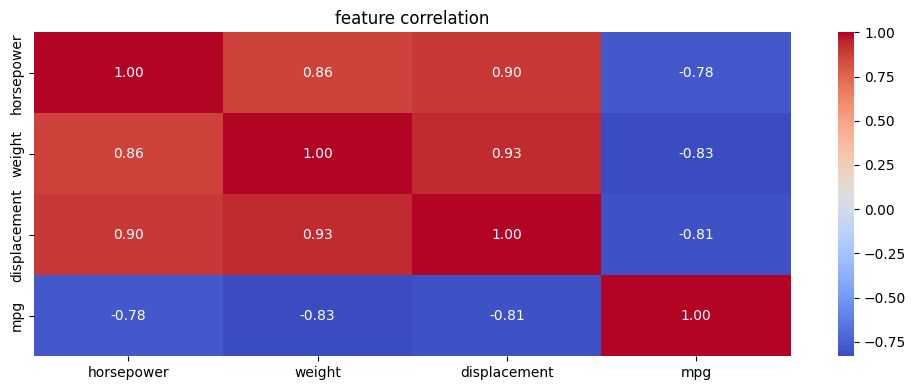

In [20]:
# 상관관계 분석

plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("feature correlation")
plt.tight_layout()
plt.show()

In [2]:

# 3) 상수항 추가 (절편)
X_const = sm.add_constant(X)

# 4) OLS(최소제곱법) 모델 학습
model = sm.OLS(y, X_const).fit()

# 5) 결과 요약 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     312.0
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          5.10e-103
Time:                        16:20:44   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2249.
Df Residuals:                     388   BIC:                             2265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.8559      1.196     37.507   

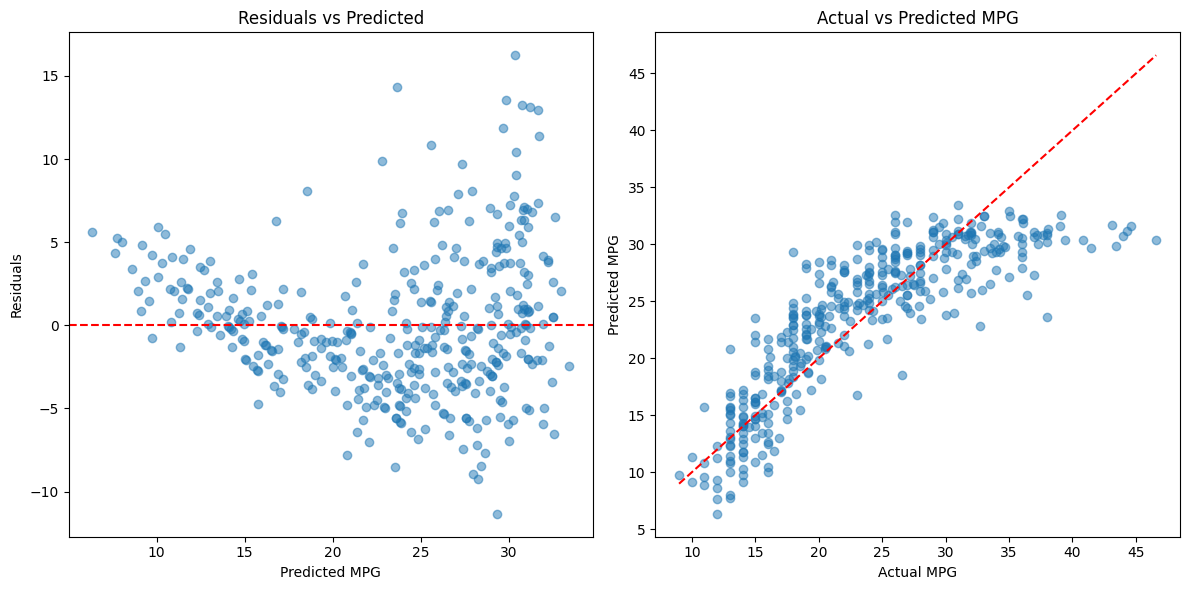

In [22]:
# Plot Residuals and Predicted vs Actual for OLS Regression
import matplotlib.pyplot as plt
# Assuming model, X_const, y are available
y_pred = model.predict(X_const)
residuals = y - y_pred

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(1,2,2)
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.tight_layout()
plt.show()

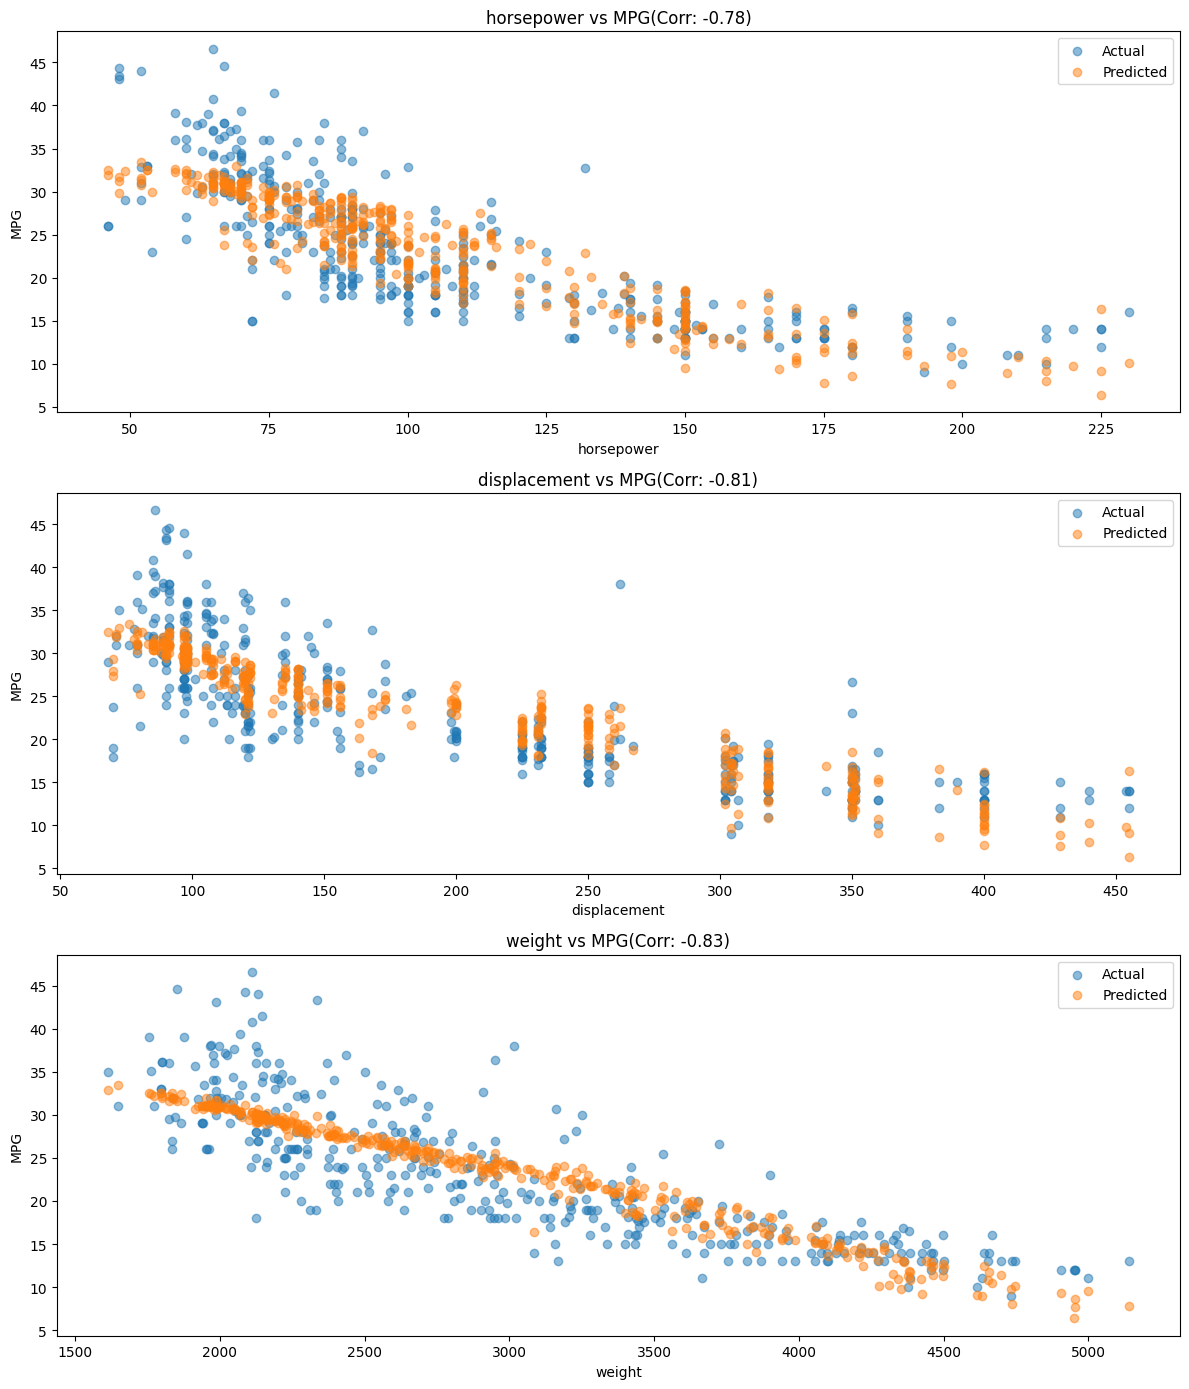

In [27]:
# 독립변수별 예측, 실제 산점도
features_sorted = corr_with_target.index.to_list()

plt.figure(figsize=(12, 14))
for idx, feat in enumerate(features_sorted):
    plt.subplot(len(features_sorted), 1, idx+1)
    plt.scatter(mpg[feat], y, alpha=0.5, label='Actual')
    plt.scatter(mpg[feat], y_pred, alpha=0.5, label='Predicted')
    plt.xlabel(feat)
    plt.ylabel('MPG')
    plt.title(f"{feat} vs MPG(Corr: {corr.loc[feat, 'mpg']:.2f})")
    plt.legend()
plt.tight_layout()
plt.show()

## 새로운 모델(KNN)로 다시 해보기

■ First 5 rows:


,horsepower,weight,displacement,mpg
0,130.0,3504,307.0,18.0
1,165.0,3693,350.0,15.0
2,150.0,3436,318.0,18.0
3,150.0,3433,304.0,16.0
4,140.0,3449,302.0,17.0



■ Summary statistics:


,count,mean,std,min,25%,50%,75%,max
horsepower,392.0,104.469388,38.491160,46.0,75.00,93.50,126.00,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.25,2803.50,3614.75,5140.0
displacement,392.0,194.411990,104.644004,68.0,105.00,151.00,275.75,455.0
mpg,392.0,23.445918,7.805007,9.0,17.00,22.75,29.00,46.6



■ Feature–Target Correlations:


,corr_with_target
horsepower,-0.778427
displacement,-0.805127
weight,-0.832244


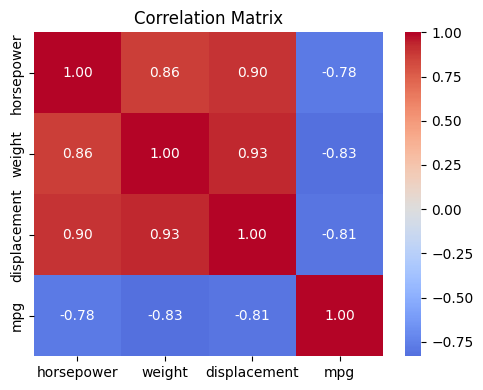


■ OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     312.0
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          5.10e-103
Time:                        17:46:52   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2249.
Df Residuals:                     388   BIC:                             2265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.85

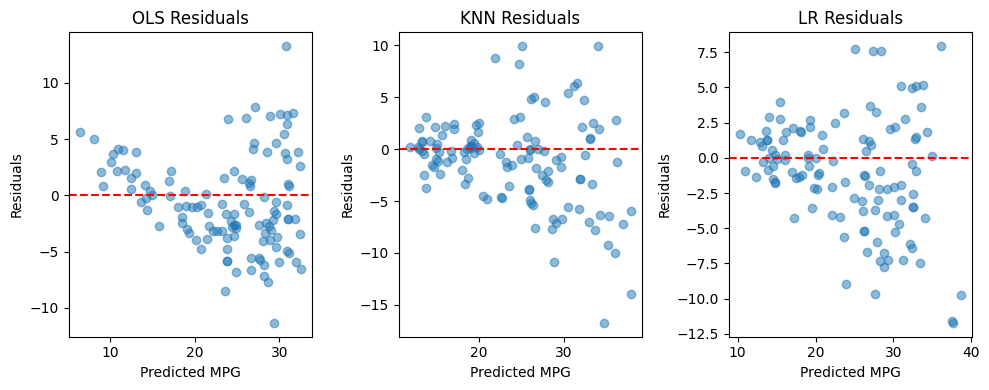

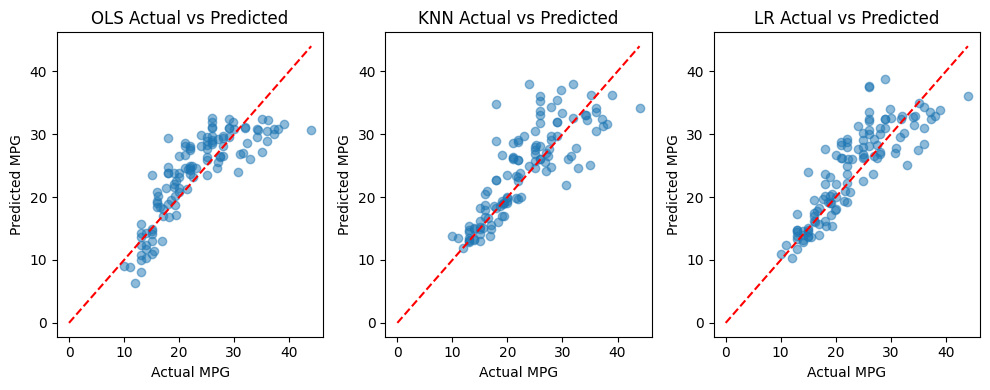

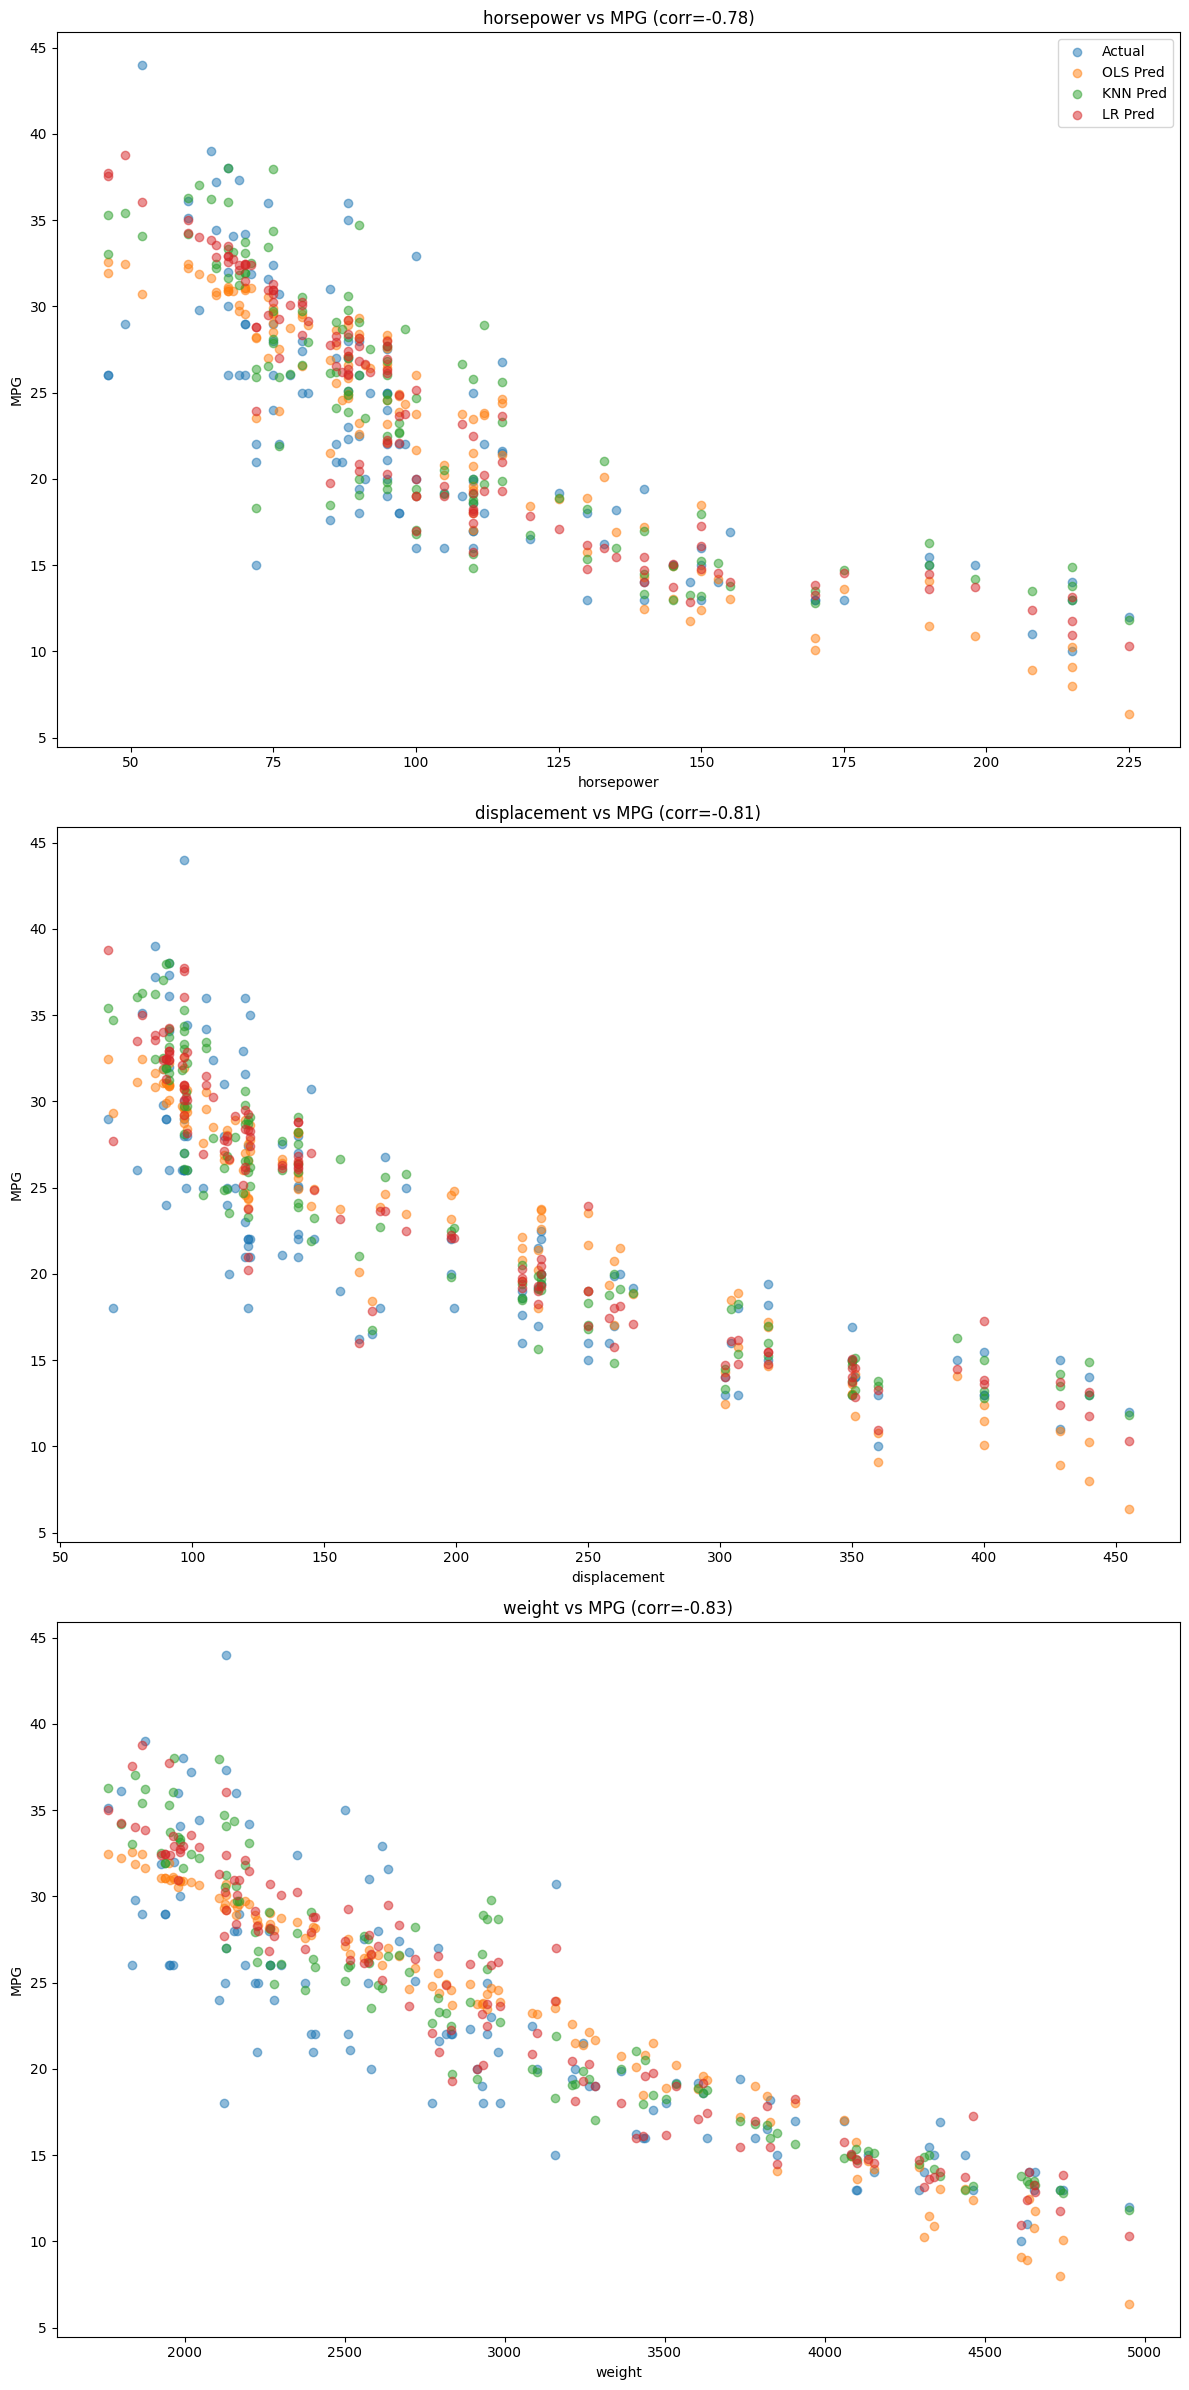

In [37]:
# 1) 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2) 데이터 로드 및 전처리
mpg = sns.load_dataset('mpg').dropna()
df = mpg[['horsepower', 'weight', 'displacement', 'mpg']]

# 3) 데이터 확인
print("■ First 5 rows:")
display(df.head())
print("\n■ Summary statistics:")
display(df.describe().T)

# 4) 상관관계 분석
corr = df.corr()
print("\n■ Feature–Target Correlations:")
corr_with_target = corr['mpg'].drop('mpg').sort_values(ascending=False)
display(corr_with_target.to_frame('corr_with_target'))

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 5) 설명 변수/타깃 분리
X = df[['horsepower', 'weight', 'displacement']]
y = df['mpg']

# 6) 학습/테스트 분할 (30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 7) OLS 회귀 (Statsmodels)
X_const = sm.add_constant(X)            # 전체 데이터 상수항 포함
ols_model = sm.OLS(y, X_const).fit()
print("\n■ OLS Regression Results:")
print(ols_model.summary())

# 8) KNN 회귀 모델 학습
knn = KNeighborsRegressor(n_neighbors=4, weights='distance', p=2)
knn.fit(X_train, y_train)


# 8-1) 다항 특성 변환 (degree=2)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_poly, y_train)


# 9) 예측
y_pred_ols = ols_model.predict(sm.add_constant(X_test))
y_pred_knn = knn.predict(X_test)
y_pred_plr = lr.predict(X_test_poly)

# 10) 평가 지표 계산
def print_metrics(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    print(f"{name}  RMSE: {rmse:.3f}, R²: {r2:.3f}")

print("\n■ Model Performance:")
print_metrics("OLS", y_test,    y_pred_ols)
print_metrics("KNN", y_test,    y_pred_knn)
print_metrics("LR", y_test,    y_pred_plr)

# 11) Residuals vs Predicted Plot
plt.figure(figsize=(10,4))
for i,(name,y_p) in enumerate([('OLS', y_pred_ols), ('KNN', y_pred_knn), ('LR', y_pred_plr)]):
    plt.subplot(1,3,i+1)
    plt.scatter(y_p, y_test - y_p, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{name} Residuals')
    plt.xlabel('Predicted MPG')
    plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# 12) Actual vs Predicted Plot
plt.figure(figsize=(10,4))
for i,(name,y_p) in enumerate([('OLS', y_pred_ols), ('KNN', y_pred_knn), ('LR', y_pred_plr)]):
    plt.subplot(1,3,i+1)
    plt.scatter(y_test, y_p, alpha=0.5)
    m = max(y_test.max(), y_p.max())
    plt.plot([0, m], [0, m], 'r--')
    plt.title(f'{name} Actual vs Predicted')
    plt.xlabel('Actual MPG')
    plt.ylabel('Predicted MPG')
plt.tight_layout()
plt.show()

# 13) Feature vs Predicted for Each Model (상관계수 높은 순)
features_sorted = corr_with_target.index.tolist()
plt.figure(figsize=(12, 8*len(features_sorted)))
for idx, feat in enumerate(features_sorted):
    plt.subplot(len(features_sorted), 1, idx+1)
    plt.scatter(X_test[feat], y_test,      label='Actual', alpha=0.5)
    plt.scatter(X_test[feat], y_pred_ols,  label='OLS Pred', alpha=0.5)
    plt.scatter(X_test[feat], y_pred_knn,  label='KNN Pred', alpha=0.5)
    plt.scatter(X_test[feat], y_pred_plr,  label='LR Pred', alpha=0.5)
    plt.title(f'{feat} vs MPG (corr={corr.loc[feat,"mpg"]:.2f})')
    plt.xlabel(feat)
    plt.ylabel('MPG')
    if idx == 0:
        plt.legend()
plt.tight_layout()
plt.show()